In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfdeparture = pd.read_csv("departure.txt")
dfdeparture2 = pd.read_csv("departure 2.txt")
dfcountry_of_destination = pd.read_csv("country of destination.txt")

In [4]:
dfdeparture

,department number,account number,weight,destination country code
0,75,26743,10,2
1,65,26382,8,3
2,45,28901,2,1


In [5]:
dfdeparture2

,department number,account number,weight,destination country code
0,65,29938,5,3
1,89,27833,4,2


In [6]:
dfcountry_of_destination

,destination country code,name,price for delivery 1KH
0,1,Ukraine,50
1,2,Poland,60
2,3,Great Britain,70


# a)

In [7]:
dfdep = pd.concat([dfdeparture, dfdeparture2], axis = 0)
df_d = dfdep['department number'].value_counts()

In [8]:
df_d=df_d.to_frame().reset_index()
df_d.rename(columns=({'index':'department number','department number':'valeu of premise'}), inplace=True)
df_d

,department number,valeu of premise
0,65,2
1,75,1
2,45,1
3,89,1


# б)

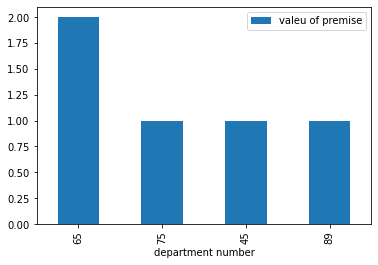

In [9]:
ax=df_d.plot(x='department number', y='valeu of premise',kind = 'bar')
plt.show()

# в)

In [10]:
dfdep=pd.merge(dfdep,dfcountry_of_destination ,on='destination country code')

dfdep['sum ']=dfdep['weight']*dfdep['price for delivery 1KH']
df3=dfdep[['department number','sum ']]

df3=df3.groupby('department number').sum()

df3

,sum
department number,
45,100
65,910
75,600
89,240


# г)

In [16]:
df4=dfdep[['sum ','name']]
df4=df4.groupby('name').sum()
df4=df4.sort_values(by=['sum '],ascending=False)
t=df4.iloc[0]

print(f"{t}\n\n\n have a maximum shipping cost")

sum     910
Name: Great Britain, dtype: int64


 have a maximum shipping cost


# д)

In [17]:
df4

,sum
name,
Great Britain,910
Poland,840
Ukraine,100
